In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
data = pd.read_csv("/content/drive/MyDrive/DE/ML/Datasets/preprocessing_dataset.csv")
data.head(15)

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
5,Frank,35.0,NaN,61000.0,Finance
6,Grace,120.0,F,NaN,Finance
7,Henry,28.0,M,59000.0,HR
8,Ivy,29.0,F,63000.0,IT
9,Jack,27.0,M,62000.0,Finance


## HANDLING MISSING VALUES

Finding null values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


In [11]:
data.isnull().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
!pip install missingno
import missingno as msno
msno.bar(data)

<Axes: >

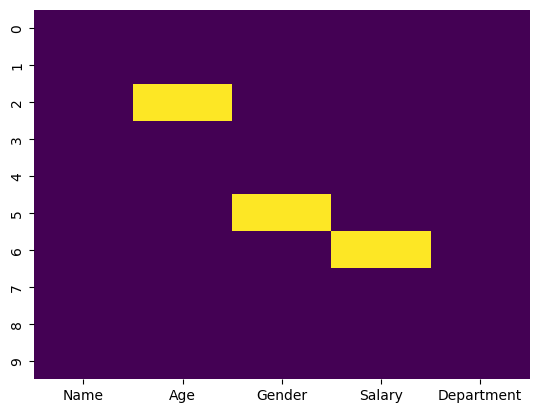

In [23]:
sns.heatmap(data.isnull(), cbar = False, cmap='viridis')

Removing nulls

In [21]:
# data = data.dropna()
data.isna().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [102]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])   #[0] - First one
data.head(10)

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.000000,HR
1,Bob,30.0,M,60000.000000,Finance
2,Charlie,29.0,M,55000.000000,IT
3,David,40.0,M,58000.000000,HR
4,Eve,22.0,F,52000.000000,IT
5,Frank,35.0,M,61000.000000,Finance
6,Grace,120.0,F,57777.777778,Finance
7,Henry,28.0,M,59000.000000,HR
8,Ivy,29.0,F,63000.000000,IT
9,Jack,27.0,M,62000.000000,Finance


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
data['Salary'] = imputer.fit_transform(data[['Salary']])

## HANDLING OUTLIERS

Finding outliers

<Axes: ylabel='Age'>

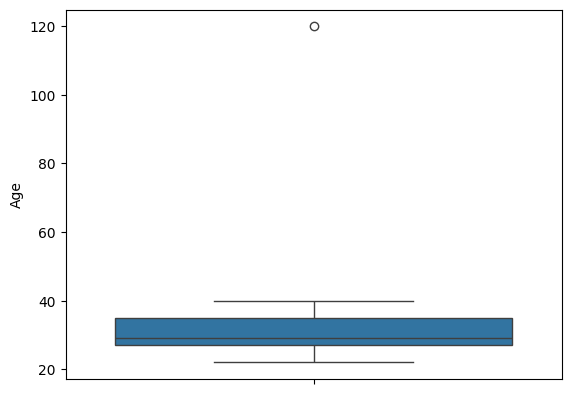

In [36]:
sns.boxplot(data['Age'])

In [41]:
# IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outliers

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


In [53]:
# zscore
from scipy.stats import zscore
z_scores = zscore(data['Age'])
data[np.abs(z_scores) > 2.5] # Common rule : zscore > 3

,Name,Age,Gender,Salary,Department


In [54]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination = 0.1)
data['outlier'] = iso.fit_predict(data[['Age', 'Salary']])
data[data['outlier'] == -1]  # 1, -1 (Outlier)

,Name,Age,Gender,Salary,Department,outlier
6,Grace,120.0,F,NaN,Finance,-1


Filling Outliers

In [65]:
data['Age'] = np.where(data['Age'] > 100, data['Age'].median(), data['Age'])
data

,Name,Age,Gender,Salary,Department,Gender_encoded
0,Alice,25.0,F,50000.000000,HR,0
1,Bob,30.0,M,60000.000000,Finance,1
2,Charlie,29.0,M,55000.000000,IT,1
3,David,40.0,M,58000.000000,HR,1
4,Eve,22.0,F,52000.000000,IT,0
5,Frank,35.0,M,61000.000000,Finance,2
6,Grace,29.0,F,57777.777778,Finance,0
7,Henry,28.0,M,59000.000000,HR,1
8,Ivy,29.0,F,63000.000000,IT,0
9,Jack,27.0,M,62000.000000,Finance,1


## Categorical -> Numerical

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender_encoded'] = le.fit_transform(data['Gender'])
data

,Name,Age,Gender,Salary,Department,Gender_encoded
0,Alice,25.0,F,50000.000000,HR,0
1,Bob,30.0,M,60000.000000,Finance,1
2,Charlie,29.0,M,55000.000000,IT,1
3,David,40.0,M,58000.000000,HR,1
4,Eve,22.0,F,52000.000000,IT,0
5,Frank,35.0,M,61000.000000,Finance,1
6,Grace,120.0,F,57777.777778,Finance,0
7,Henry,28.0,M,59000.000000,HR,1
8,Ivy,29.0,F,63000.000000,IT,0
9,Jack,27.0,M,62000.000000,Finance,1


In [78]:
data = pd.get_dummies(data, columns = ['Department'])
data

,Name,Age,Gender,Salary,Department_Finance,Department_HR,Department_IT
0,Alice,25.0,F,50000.000000,False,True,False
1,Bob,30.0,M,60000.000000,True,False,False
2,Charlie,29.0,M,55000.000000,False,False,True
3,David,40.0,M,58000.000000,False,True,False
4,Eve,22.0,F,52000.000000,False,False,True
5,Frank,35.0,M,61000.000000,True,False,False
6,Grace,120.0,F,57777.777778,True,False,False
7,Henry,28.0,M,59000.000000,False,True,False
8,Ivy,29.0,F,63000.000000,False,False,True
9,Jack,27.0,M,62000.000000,True,False,False


In [99]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
data['Gender'] = ohe.fit_transform(data[['Gender']])
data

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

Standardization

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age_std'] = scaler.fit_transform(data[['Age']])
data['Salary_std'] = scaler.fit_transform(data[['Salary']])
data

,Name,Age,Gender,Salary,Department,Age_std,Salary_std
0,Alice,25.0,F,50000.000000,HR,-0.489487,-1.923193e+00
1,Bob,30.0,M,60000.000000,Finance,-0.308196,5.494837e-01
2,Charlie,29.0,M,55000.000000,IT,-0.344454,-6.868547e-01
3,David,40.0,M,58000.000000,HR,0.054387,5.494837e-02
4,Eve,22.0,F,52000.000000,IT,-0.598262,-1.428658e+00
5,Frank,35.0,M,61000.000000,Finance,-0.126904,7.967514e-01
6,Grace,120.0,F,57777.777778,Finance,2.955052,1.799109e-15
7,Henry,28.0,M,59000.000000,HR,-0.380712,3.022161e-01
8,Ivy,29.0,F,63000.000000,IT,-0.344454,1.291287e+00
9,Jack,27.0,M,62000.000000,Finance,-0.416971,1.044019e+00


In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age_std'] = scaler.fit_transform(data[['Age']])
data['Salary_std'] = scaler.fit_transform(data[['Salary']])
data

,Name,Age,Gender,Salary,Department,Age_std,Salary_std
0,Alice,25.0,F,50000.000000,HR,0.030612,0.000000
1,Bob,30.0,M,60000.000000,Finance,0.081633,0.769231
2,Charlie,29.0,M,55000.000000,IT,0.071429,0.384615
3,David,40.0,M,58000.000000,HR,0.183673,0.615385
4,Eve,22.0,F,52000.000000,IT,0.000000,0.153846
5,Frank,35.0,M,61000.000000,Finance,0.132653,0.846154
6,Grace,120.0,F,57777.777778,Finance,1.000000,0.598291
7,Henry,28.0,M,59000.000000,HR,0.061224,0.692308
8,Ivy,29.0,F,63000.000000,IT,0.071429,1.000000
9,Jack,27.0,M,62000.000000,Finance,0.051020,0.923077
